In [4]:
import sqlite3
conn = sqlite3.connect('newdatabase.sqlite3')
c = conn.cursor()

# ეს ბრძანება n-ში ინახავს ყველა იმ "BigFoot"-ის ხილვის რეპორტს რომელიც New-York-ში მოხდა.
n = c.execute('SELECT count(*) FROM bfro_reports WHERE field4="New York"').fetchone()[0]
print(n)

# ამ ბრძანებებით მომხმარებელი კონსოლიდან შეიყვანს სხვადასხვა ინფორმაციას და ის დაემატება ბაზაში.
year = input('შეიყვანე წელი: ')
season = input('შეიყვანე სეზონი: ')
country = input('შეიყვანე ქვეყანა: ')
observation = input('აღწერე თუ რა დაინახე (როგორ გამოიყურებოდა Bigfoot-ი | სად იყოს ის | რა ხდებოდა გარშემო) - ')

c.execute("INSERT INTO bfro_reports (field2, field3, field5, field8) VALUES (?, ?, ?, ?)", (year, season, country, observation))
conn.commit()

# ამ ბრძანებებით მომხმარებელი შეცვლის ბაზაში არსებულ კონკრეტულ წელს სხვა სასურველი წლით.
old_year = input('შეიყვანე წელი, რომელიც გინდა რომ ჩაანაცვლო: ')
new_year = input("შეიყვანე ახალი წელი, რომელიც გინდა, რომ ძველის მაგივრად შეიყვანო ბაზაში: ")

c.execute(f"UPDATE bfro_reports SET field2='{new_year}' WHERE field2='{old_year}'")
conn.commit()

# ამ ბრძანებით მომხმარებელი წაშლის მის მიერ შეყვანილ კონკრეტულ სეზონს.
delete_season = input("შეიყვანეთ სეზონი, რომლის ბაზიდან წაშლაც გსურთ: ")

c.execute(f"DELETE FROM bfro_reports WHERE field3 = '{delete_season}'")
conn.commit()

94
შეიყვანე წელი: 2006
შეიყვანე სეზონი: Summer
შეიყვანე ქვეყანა: Tbilisi
აღწერე თუ რა დაინახე (როგორ გამოიყურებოდა Bigfoot-ი | სად იყოს ის | რა ხდებოდა გარშემო) - Nothing
შეიყვანე წელი, რომელიც გინდა რომ ჩაანაცვლო: 2020
შეიყვანე ახალი წელი, რომელიც გინდა, რომ ძველის მაგივრად შეიყვანო ბაზაში: 1999
შეიყვანეთ სეზონი, რომლის ბაზიდან წაშლაც გსურთ: October


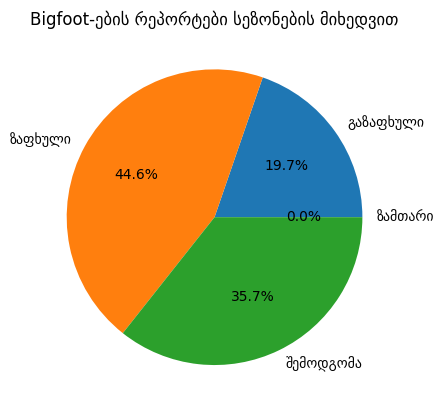

In [5]:
# წრიული დიაგრამა, რომელიც ასახავს Bigfoot-ების რეპორტებს პროცენტულად სეზონების მიხედვით
import matplotlib.pyplot as plt

labels = 'გაზაფხული', 'ზაფხული', 'შემოდგომა', 'ზამთარი'
count_spring = c.execute('SELECT count(*) FROM bfro_reports WHERE field3="Spring"').fetchone()[0]
count_summer = c.execute('SELECT count(*) FROM bfro_reports WHERE field3="Summer"').fetchone()[0]
count_fall = c.execute('SELECT count(*) FROM bfro_reports WHERE field3="Fall"').fetchone()[0]
count_winter = c.execute('SELECT count(*) FROM bfro_reports WHERE field3="Winter"').fetchone()[0]
sizes = [count_spring, count_summer, count_fall, count_winter]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Bigfoot-ების რეპორტები სეზონების მიხედვით')
plt.show()

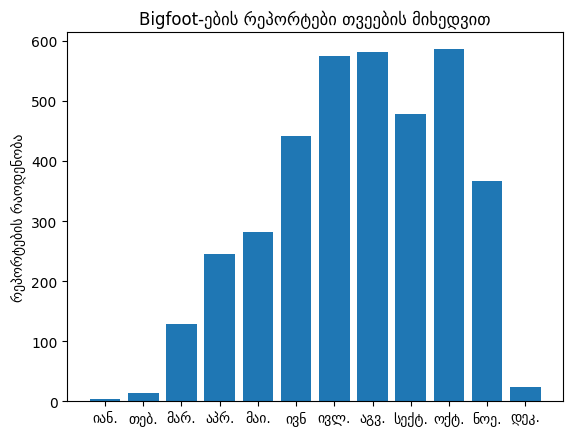

In [6]:
# ბარ დიაგრამა, რომელიც ასახავს Bigfoot-ების რეპორტების რაოდენობას თვეების მიხედვით.
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['იან.', 'თებ.', 'მარ.', 'აპრ.',
          'მაი.', 'ივნ', 'ივლ.', 'აგვ.',
          'სექტ.', 'ოქტ.', 'ნოე.', 'დეკ.']
count_january = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="January"').fetchone()[0]
count_february = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="February"').fetchone()[0]
count_march = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="March"').fetchone()[0]
count_april = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="April"').fetchone()[0]
count_may = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="May"').fetchone()[0]
count_june = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="June"').fetchone()[0]
count_july = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="July"').fetchone()[0]
count_august = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="August"').fetchone()[0]
count_september = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="September"').fetchone()[0]
count_october = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="October"').fetchone()[0]
count_november = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="November"').fetchone()[0]
count_december = c.execute('SELECT count(*) FROM bfro_reports WHERE field17="December"').fetchone()[0]
counts = [count_january, count_february, count_march, count_april,
          count_may, count_june, count_july, count_august,
          count_september, count_october, count_november, count_december]

ax.bar(fruits, counts)

ax.set_ylabel('რეპორტების რაოდენობა')
ax.set_title('Bigfoot-ების რეპორტები თვეების მიხედვით')

plt.show()
conn.close()